<a href="https://colab.research.google.com/github/silvesttrnovikov-crypto/Homework_/blob/main/untitl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нomework_1

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 10:13:03--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 10:13:03 (4.93 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1efUeYyQWo9A_rZWk49RUDOX3FIwUnG0_WcQI7YXr-hI/edit#gid=0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1pZaZC8cX5bFUM6Ac14rErB2glVI0cR116Xjv3a_2ncM/edit#gid=0


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('InteractiveSheet_2025-10-13_10_14_51.xlsx', sheet_name='Лист1')
survival = df.groupby('Pclass')['Survived'].mean()
print(survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


2

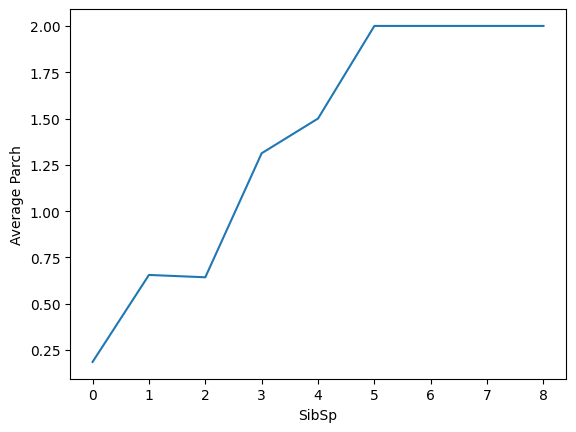

In [ ]:
data.groupby('SibSp')['Parch'].mean().plot()
plt.xlabel('SibSp')
plt.ylabel('Average Parch')
plt.show()

3

In [ ]:
#Чтобы улучшть точность нужно увеличить число ближаших соседей и число признаков
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.85


4

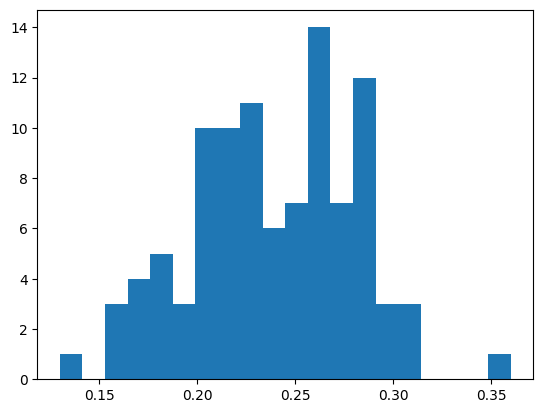

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5)

data = pd.read_csv("train.csv", index_col='PassengerId')

test_scores = []

for i in range(100):
    data_train, data_test = train_test_split(data, test_size=100, random_state=i)#не заметил эту функцию в тексте задания - долго не мог понять как сделать этот этап

    model.fit(
        feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
        data_train['Survived']
    )

    test_predictions = model.predict(
        feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
    )

    accuracy = accuracy_score(data_test['Survived'], test_predictions)
    test_scores.append(accuracy)

test_errors = [1 - score for score in test_scores]

plt.hist(test_errors, bins=20)
plt.show()

#Homework_2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1

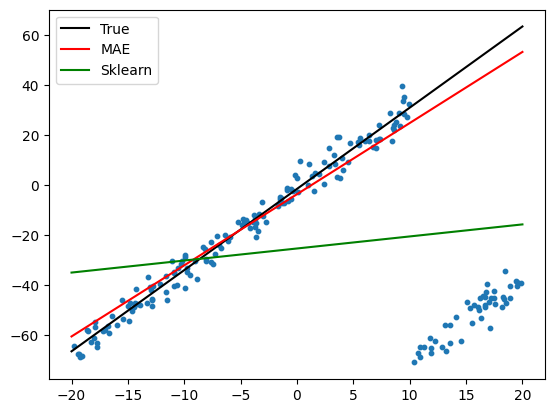

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(50)
x = np.random.uniform(-20, 20, 200)
y = 3.25 * x - 1.47 + np.random.normal(size=200) * 4
y[x > 10] += -100  # выбросы

w = np.random.randn(2)
for i in range(1000):
    y_pred = w[0] + w[1] * x
    w[0] -= 0.01 * -np.mean(np.sign(y - y_pred))
    w[1] -= 0.01 * -np.mean(np.sign(y - y_pred) * x)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

plt.scatter(x, y, s=10)
x_plot = np.linspace(-20, 20, 200)
plt.plot(x_plot, 3.25*x_plot - 1.47, 'k', label='True')
plt.plot(x_plot, w[0] + w[1]*x_plot, 'r', label='MAE')
plt.plot(x_plot, lr.predict(x_plot.reshape(-1, 1)), 'g', label='Sklearn')
plt.legend()
plt.show()
# очевидно MAE менее чувствительна к выбросам и как следствие дает лучшее приближение

2

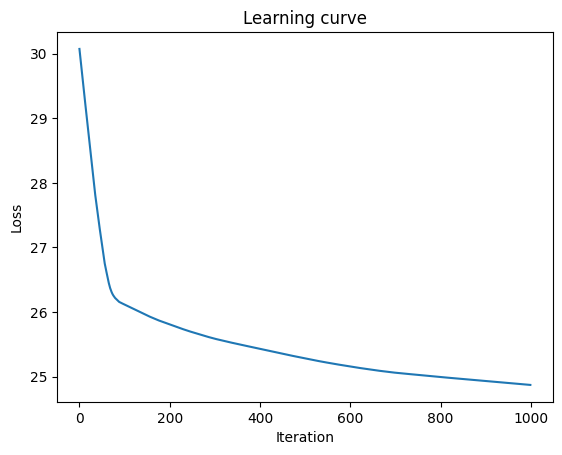

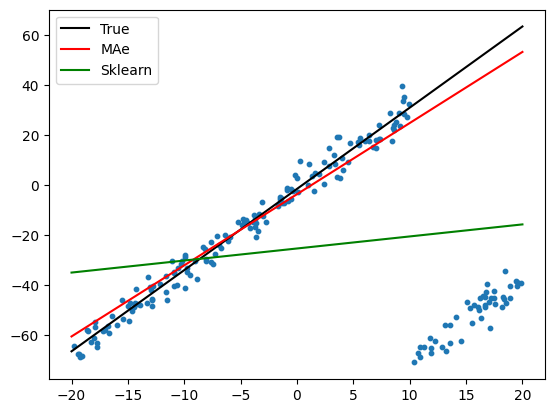

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

class LinearRegressionSGD(BaseEstimator, RegressorMixin):
    def __init__(self, loss='mae', lr=0.01, n_iter=1000):
        self.loss, self.lr, self.n_iter = loss, lr, n_iter
    def fit(self, x, y):
        x = x.ravel()
        self.w = np.random.randn(2)
        self.history = []
        for _ in range(self.n_iter):
            y_pred = self.w[0] + self.w[1]*x
            err = y - y_pred
            g = -np.sign(err) if self.loss=='mae' else -2*err
            self.w[0] -= self.lr*np.mean(g)
            self.w[1] -= self.lr*np.mean(g*x)
            self.history.append(np.mean(np.abs(err)) if self.loss=='mae' else np.mean(err**2))
        return self
    def predict(self, x): return self.w[0] + self.w[1]*x.ravel()
    def fit_predict(self, x, y): return self.fit(x, y).predict(x)

np.random.seed(50)
x = np.random.uniform(-20, 20, 200)
y = 3.25*x - 1.47 + np.random.normal(size=200)*4
y[x > 10] += -100

model = LinearRegressionSGD(loss='mae', lr=0.01, n_iter=1000).fit(x, y)
lr = LinearRegression().fit(x.reshape(-1,1), y)

plt.plot(model.history)
plt.title('Learning curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

x_plot = np.linspace(-20, 20, 200)
plt.scatter(x, y, s=10)
plt.plot(x_plot, 3.25*x_plot - 1.47, 'k', label='True')
plt.plot(x_plot, model.predict(x_plot), 'r', label='MAe')
plt.plot(x_plot, lr.predict(x_plot.reshape(-1,1)), 'g', label='Sklearn')
plt.legend(); plt.show()
#зависимость не изменилась

#Homework_3

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 11:46:41--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 11:46:41 (5.09 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].copy()
    features["Fare"] = features["Fare"].fillna(features["Fare"].median())
    features["Age"] = features["Age"].fillna(features["Age"].median())
    features["Embarked"] = features["Embarked"].fillna("S")
    features["FamilySize"] = features["SibSp"] + features["Parch"] + 1
    features["FarePerPerson"] = features["Fare"] / features["FamilySize"]
    features["Age*Class"] = features["Age"] * features["Pclass"]
    features["IsAlone"] = (features["FamilySize"] == 1).astype(int)
    return features

model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), ["Sex", "Embarked"]),
        remainder=StandardScaler()
    ),
    LogisticRegression(C=0.1, max_iter=1000)
)

# Validation code
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
    data_train['Survived']
)

train_predictions = model.predict(feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)))
test_predictions = model.predict(feature_selection_and_preprocessing(data_test.drop('Survived', axis=1)))

print("Train accuracy:", accuracy_score(data_train['Survived'], train_predictions))
print("Test accuracy:", accuracy_score(data_test['Survived'], test_predictions))

Train accuracy: 0.7988422575976846
Test accuracy: 0.81


#Homework_4

1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

100%|██████████| 100/100 [00:00<00:00, 547.34it/s]


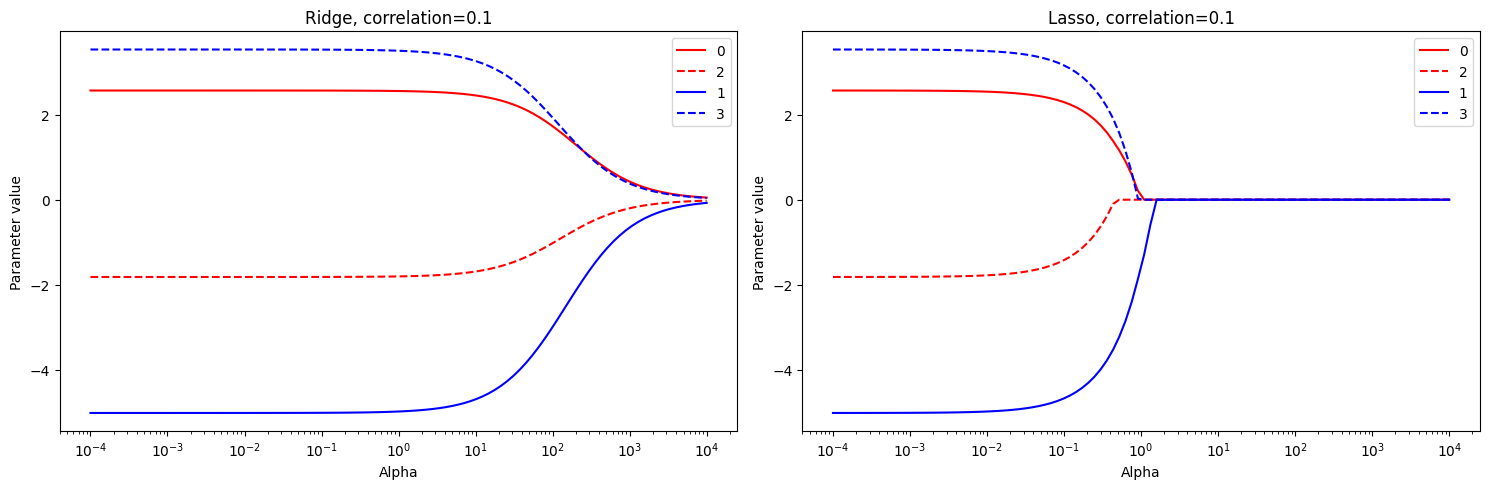

100%|██████████| 100/100 [00:00<00:00, 367.14it/s]


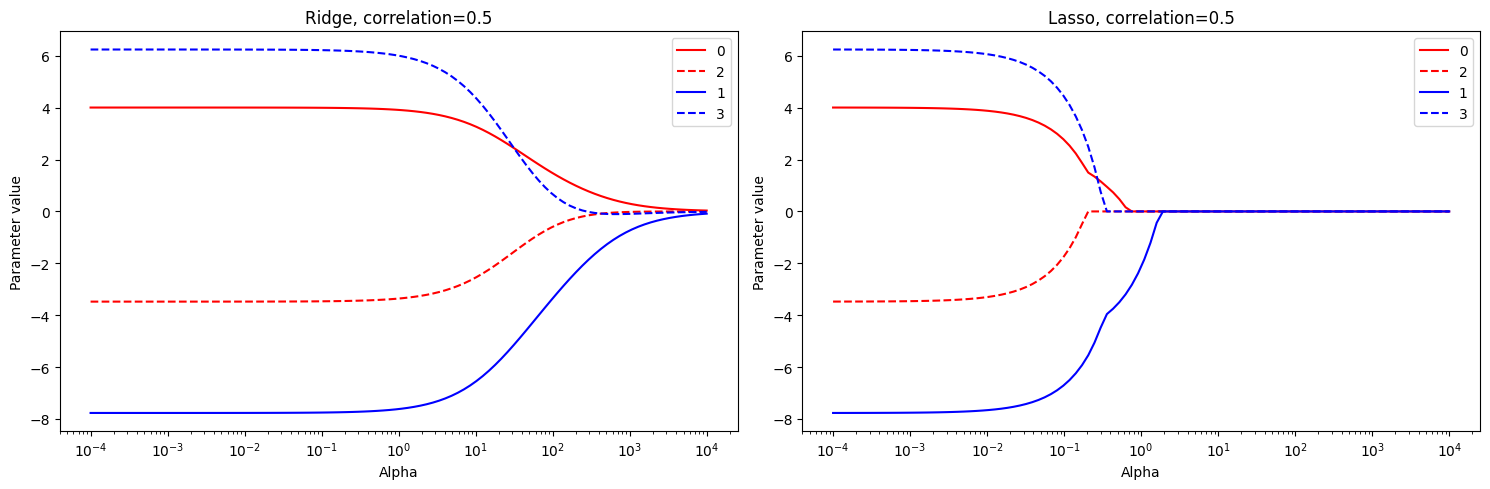

100%|██████████| 100/100 [00:00<00:00, 407.58it/s]


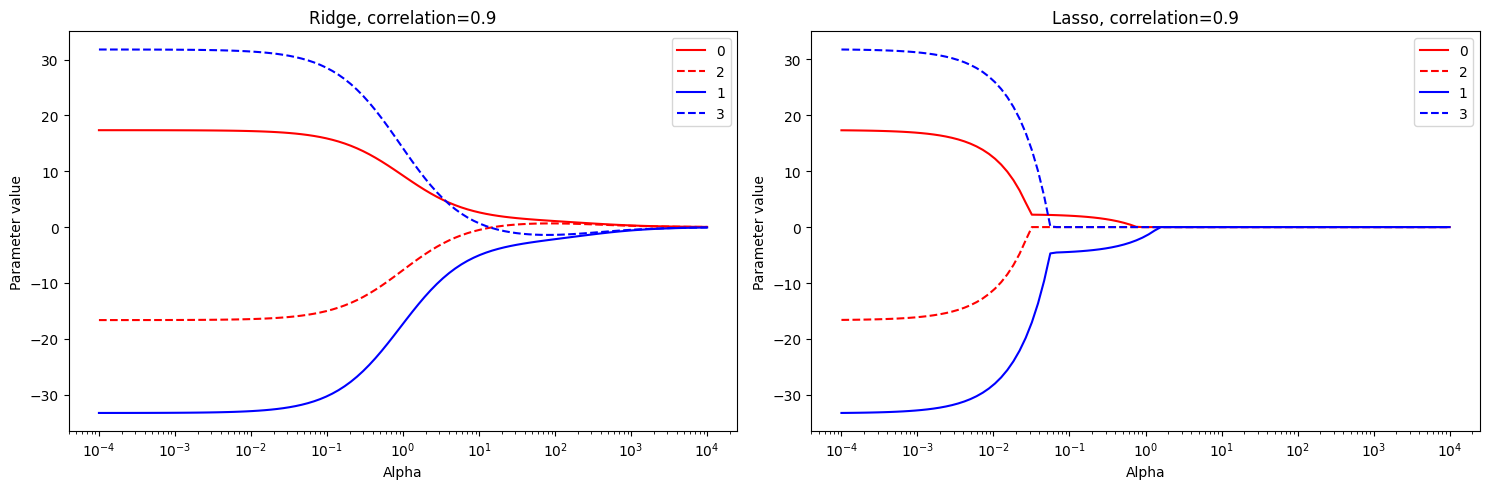

In [ ]:

from tqdm import tqdm
def gen_data(N, correlation=0.5):
    X = np.random.uniform(-1., 1., size=(N, 4))
    y = X @ [2.3, -4.7, -1.7, 3.2]
    X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]
    y += np.random.normal(size=y.shape)
    return X, y

for correlation in [0.1, 0.5, 0.9]:
    X, y = gen_data(500, correlation)
    alpha_values = np.logspace(-4, 4, 100, base=10)

    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        ridge = Ridge(alpha=alpha, fit_intercept=False)
        ridge.fit(X, y)
        params_ridge.append(ridge.coef_)

        lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
        lasso.fit(X, y)
        params_lasso.append(lasso.coef_)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(alpha_values, [p[0] for p in params_ridge], 'r-', label='0')
    plt.plot(alpha_values, [p[2] for p in params_ridge], 'r--', label='2')
    plt.plot(alpha_values, [p[1] for p in params_ridge], 'b-', label='1')
    plt.plot(alpha_values, [p[3] for p in params_ridge], 'b--', label='3')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Parameter value')
    plt.title(f'Ridge, correlation={correlation}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(alpha_values, [p[0] for p in params_lasso], 'r-', label='0')
    plt.plot(alpha_values, [p[2] for p in params_lasso], 'r--', label='2')
    plt.plot(alpha_values, [p[1] for p in params_lasso], 'b-', label='1')
    plt.plot(alpha_values, [p[3] for p in params_lasso], 'b--', label='3')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Parameter value')
    plt.title(f'Lasso, correlation={correlation}')
    plt.legend()

    plt.tight_layout()
    plt.show()

При увеличении корреляции параметры сжимаются к одинаковым значениям быстрее, причем для Lasso это сжатие происходит значитльно быстрее. При этом Ridge сходится равномерно, тогда как Lasso неравномерно (рывком)

#Homework_5

1


X_best = FeatureSelector(num_features_best).fit_transform(X, y)
Отбор признаков (feature selection) выполняется до (cross-validation), в результате для обучения используются как обучающая, так и тестовая выборки.

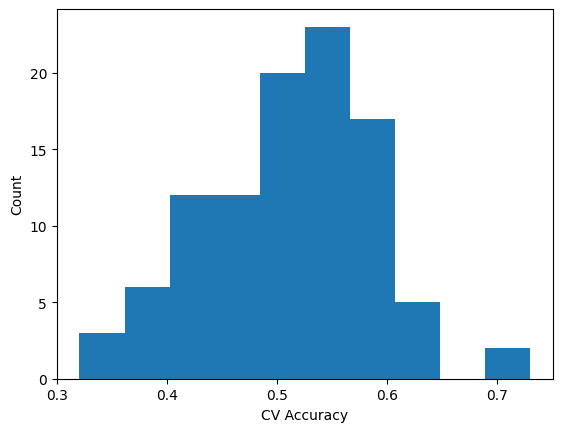

0.5123000000000001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

class FeatureSelector:
    def __init__(self, num_features):
        self.n = num_features

    def fit(self, X, y):
        covariance = ((X - X.mean(axis=0)) * (y[:, np.newaxis] - y.mean())).mean(axis=0)
        self.best_feature_ids = np.argsort(np.abs(covariance))[-self.n:]
        return self

    def transform(self, X):
        return X[:, self.best_feature_ids]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

num_features_total = 1000
num_features_best = 100
N = 100

def experiment():
    X = np.random.normal(size=(N, num_features_total))
    y = np.random.randint(2, size=N)

    pipeline = Pipeline([
        ('selector', FeatureSelector(num_features_best)),
        ('model', LinearSVC())
    ])

    return cross_val_score(pipeline, X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

results = [experiment() for _ in range(100)]
plt.hist(results, bins=10)
plt.xlabel("CV Accuracy")
plt.ylabel("Count")
plt.show()

print(np.mean(results))


2

In [ ]:
!wget -q https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]
X_train = feature_selection_and_preprocessing(data_train.drop('Survived', axis=1))
y_train = data_train['Survived']
X_test = feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
y_test = data_test['Survived']
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
best_knn = grid_search.best_estimator_
test_predictions = best_knn.predict(X_test)
print(accuracy_score(y_test, test_predictions))

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.7788472255393678
0.82


#Homework_6

1

max_depth=1: train accuracy=0.5072
max_depth=2: train accuracy=0.5113
max_depth=3: train accuracy=0.5387
max_depth=4: train accuracy=0.9037
max_depth=5: train accuracy=1.0000

Минимальная глубина дерева с accuracy > 0.99: 5


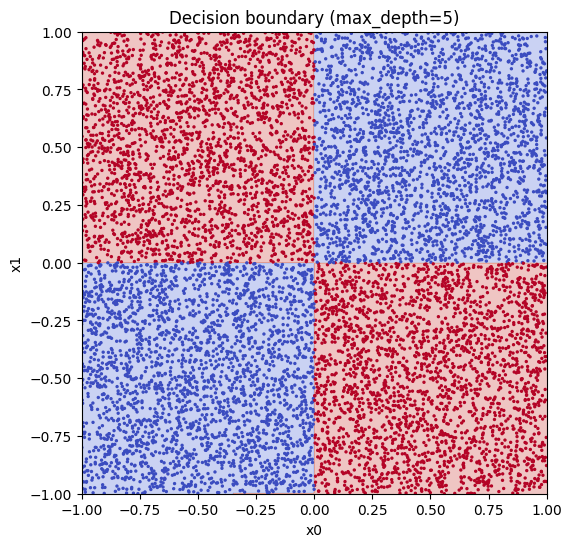

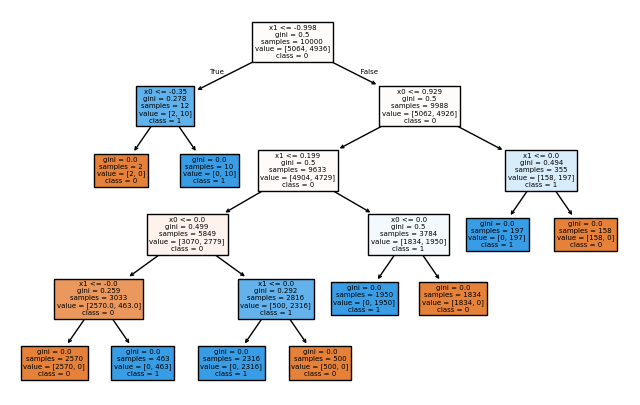

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
N = 10000
X = np.random.uniform(-1, 1, (N, 2))
y = ((X[:, 0] >= 0) ^ (X[:, 1] >= 0)).astype(int)
best_depth = None
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    print(f"max_depth={depth}: train accuracy={acc:.4f}")
    if acc > 0.99:
        best_depth = depth
        break
print("\nМинимальная глубина дерева с accuracy > 0.99:", best_depth)
model = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
model.fit(X, y)
xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=2)
plt.title(f"Decision boundary (max_depth={best_depth})")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()
plt.figure(figsize=(8,5))
plot_tree(model, filled=True, feature_names=["x0", "x1"], class_names=["0", "1"])
plt.show()


2

Best ROC-AUC (no weights, train CV): 0.9741673813607775
Test ROC-AUC (no weights): 0.9534313725490197
Best ROC-AUC (weighted, train CV): 0.9703473413379073
Test ROC-AUC (weighted): 0.9401108269394715


<Figure size 600x600 with 0 Axes>

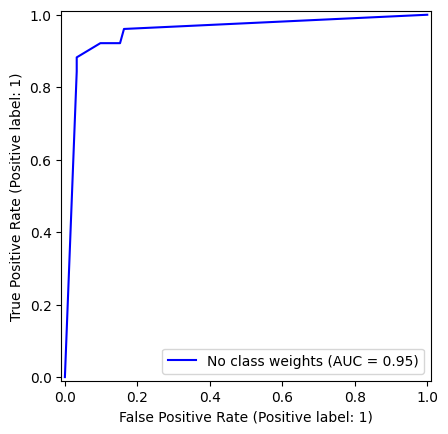

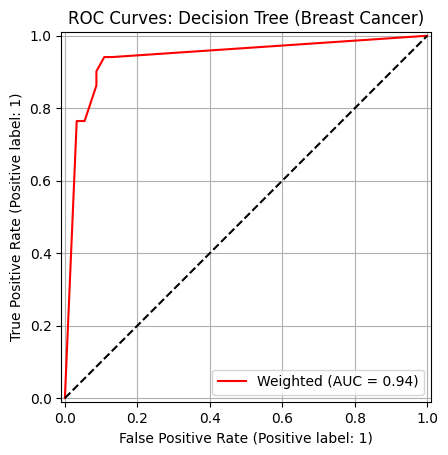

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12345
)

def find_best_tree(class_weight=None):
    tree = DecisionTreeClassifier(random_state=12345, class_weight=class_weight)
    param_grid = {
        "max_depth": range(1, 11),
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 5, 10]
    }
    grid = GridSearchCV(
        estimator=tree,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )
    grid.fit(X_train, (y_train == "malignant").astype(int))
    return grid.best_estimator_, grid.best_score_

best_tree_no_weights, auc_train_no_w = find_best_tree(class_weight=None)

best_tree_weighted, auc_train_w = find_best_tree(class_weight={1: 2., 0: 1.})

y_test_bin = (y_test == "malignant").astype(int)

proba_no_weights = best_tree_no_weights.predict_proba(X_test)[:, 1]
proba_weighted = best_tree_weighted.predict_proba(X_test)[:, 1]

roc_auc_no_weights = roc_auc_score(y_test_bin, proba_no_weights)
roc_auc_weighted = roc_auc_score(y_test_bin, proba_weighted)

print("Best ROC-AUC (no weights, train CV):", auc_train_no_w)
print("Test ROC-AUC (no weights):", roc_auc_no_weights)
print("Best ROC-AUC (weighted, train CV):", auc_train_w)
print("Test ROC-AUC (weighted):", roc_auc_weighted)

plt.figure(figsize=(6,6))
RocCurveDisplay.from_predictions(y_test_bin, proba_no_weights, name="No class weights", color="blue")
RocCurveDisplay.from_predictions(y_test_bin, proba_weighted, name="Weighted", color="red")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves: Decision Tree (Breast Cancer)")
plt.grid(True)
plt.show()


Accuracy: 0.69


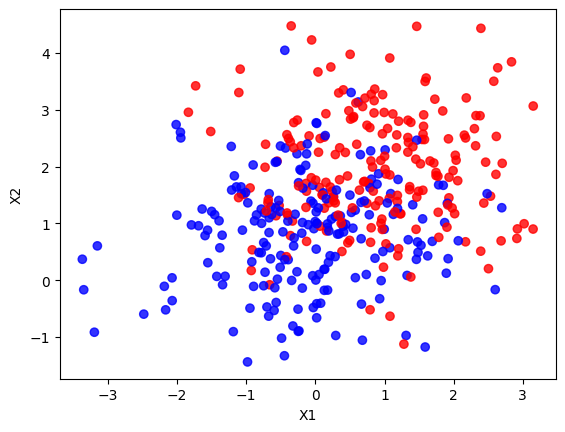

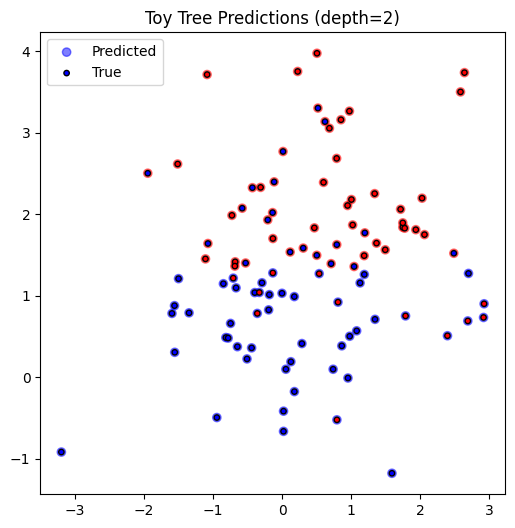

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from scipy.optimize import minimize

X_toy, y_toy = make_blobs(n_samples=400,
                          centers=[[0., 1.], [1., 2.]],
                          random_state=14)

plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, alpha=0.8, cmap='bwr')
plt.xlabel('X1'), plt.ylabel('X2');

X_toy_train, X_toy_test, y_toy_train, y_toy_test = \
    train_test_split(X_toy, y_toy, test_size=0.25, random_state=0)

max_tree_depth = 2

class Tree:
    def __init__(self, data=None, left=None, right=None, prediction=0, level=0):
        self.data = data
        self.left  = left
        self.right = right
        self.rule = lambda x, i: print("Try to run fit first")
        self.prediction = prediction
        self.level = level

    def __str__(self):
        return f"Tree(level={self.level}, pred={self.prediction})"

    def is_leaf(self):
        return self.left is None and self.right is None

    def predict(self, some_data, indices=None, predictions=None):
        predictions = np.full((some_data.shape[0]), 2) if predictions is None else predictions
        indices = np.arange(some_data.shape[0]) if indices is None else indices

        if self.is_leaf():
            predictions[indices] = self.prediction
        else:
            left_inds, right_inds = self.rule(some_data, indices)
            self.left.predict(some_data, indices=left_inds, predictions=predictions)
            self.right.predict(some_data, indices=right_inds, predictions=predictions)
        if self.level == 0:
            return predictions

    def gini(self, y):
        if len(y) == 0:
            return 0
        p = np.mean(y)
        return 2 * p * (1 - p)

    def fit(self, X, y):
        if self.level >= max_tree_depth or len(np.unique(y)) == 1:
            self.prediction = int(np.mean(y) >= 0.5)
            return self

        best_feat, best_thresh, best_score = None, None, np.inf

        for feat in range(X.shape[1]):
            def objective(threshold):
                left_mask = X[:, feat] <= threshold
                right_mask = ~left_mask
                gini_left = self.gini(y[left_mask])
                gini_right = self.gini(y[right_mask])
                weighted = (len(y[left_mask]) * gini_left + len(y[right_mask]) * gini_right) / len(y)
                return weighted

            res = minimize(objective, x0=np.median(X[:, feat]), bounds=[(X[:, feat].min(), X[:, feat].max())])
            if res.fun < best_score:
                best_score = res.fun
                best_feat = feat
                best_thresh = res.x[0]

        def rule_func(in_X, indices):
            mask = in_X[indices, best_feat] <= best_thresh
            return indices[mask], indices[~mask]

        self.rule = rule_func
        self.data = (best_feat, best_thresh)

        left_inds, right_inds = self.rule(X, np.arange(X.shape[0]))

        self.left = Tree(level=self.level + 1)
        self.left.fit(X[left_inds], y[left_inds])

        self.right = Tree(level=self.level + 1)
        self.right.fit(X[right_inds], y[right_inds])

        return self

tree = Tree()
tree.fit(X_toy_train, y_toy_train)
my_preds = tree.predict(X_toy_test)

print("Accuracy:", accuracy_score(y_toy_test, my_preds))

plt.figure(figsize=(6,6))
plt.scatter(X_toy_test[:,0], X_toy_test[:,1], c=my_preds, cmap='bwr', alpha=0.5, label='Predicted')
plt.scatter(X_toy_test[:,0], X_toy_test[:,1], c=y_toy_test, cmap='bwr', edgecolor='k', s=15, label='True')
plt.legend()
plt.title("Toy Tree Predictions (depth=2)")
plt.show()

#Homework_7

1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


dataset = fetch_california_housing()

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

print(len(data))
data.head(10)

20640


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
5    -122.25   2.697  
6    -122.25   2.992  
7    -122.25   2.414  
8    -122.26   2.267  
9    -122.25   2.611

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataset = fetch_california_housing()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

knn_pipeline = make_pipeline(
    make_column_transformer(('passthrough', ['Longitude', 'Latitude']), remainder='drop'),
    KNeighborsRegressor()
)

knn_param_grid = {
    'kneighborsregressor__n_neighbors': [3, 5, 7, 9, 11],
    'kneighborsregressor__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

rf_pipeline = make_pipeline(
    make_column_transformer(('drop', ['Longitude', 'Latitude']), remainder='passthrough'),
    RandomForestRegressor(random_state=1234)
)

rf_param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [10, 20, None],
    'randomforestregressor__min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

base_models = [
    ('knn', best_knn),
    ('rf', best_rf)
]

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

stacking_regressor.fit(X_train, y_train)

knn_pred = best_knn.predict(X_test)
rf_pred = best_rf.predict(X_test)
stacking_pred = stacking_regressor.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)

print(f"kNN Test MSE: {knn_mse:.4f}")
print(f"Random Forest Test MSE: {rf_mse:.4f}")
print(f"Stacking Regressor Test MSE: {stacking_mse:.4f}")

kNN Test MSE: 0.2966
Random Forest Test MSE: 0.4271
Stacking Regressor Test MSE: 0.2292


#Homework_8

1

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

X1 = np.random.normal(size=1000, scale=0.3).astype('float32')
X2 = np.random.normal(size=2000, loc=5., scale=2.).astype('float32')
X = np.concatenate([X1, X2])
np.random.shuffle(X)

def gaussian(x, mu, sigma):
    return torch.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * torch.sqrt(2 * torch.tensor(np.pi)))

def mixture(x, f1, f2, alpha):
    return alpha * f1(x) + (1. - alpha) * f2(x)

m1 = torch.tensor([0.0], requires_grad=True)
m2 = torch.tensor([3.0], requires_grad=True)
s1 = torch.tensor([1.0], requires_grad=True)
s2 = torch.tensor([3.0], requires_grad=True)
alpha = torch.tensor([0.5], requires_grad=True)

def apply_constraints():
    with torch.no_grad():
        s1.data.clamp_(min=1e-5)
        s2.data.clamp_(min=1e-5)
        alpha.data.clamp_(min=1e-5, max=1-1e-5)

variables = [m1, m2, s1, s2, alpha]

def model_pdf(x):
    return mixture(x,
                   lambda t: gaussian(t, m1, s1),
                   lambda t: gaussian(t, m2, s2),
                   alpha)

def loglike(x):
    pdf = model_pdf(x)
    return torch.sum(torch.log(pdf + 1e-10))

X_tensor = torch.tensor(X, dtype=torch.float32)

learning_rate = 0.0001
grad_history = []

for i in range(30):
    for var in variables:
        if var.grad is not None:
            var.grad.zero_()

    l = loglike(X_tensor)
    l.backward()

    with torch.no_grad():
        for var in variables:
            var.data += learning_rate * var.grad

    apply_constraints()

    grad_history.append([var.grad.item() if var.grad is not None else 0 for var in variables])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(X, bins=200, density=True, label='data')
    x_grid = np.linspace(-2, 12, 150)
    with torch.no_grad():
        y_grid = model_pdf(torch.tensor(x_grid, dtype=torch.float32)).numpy()
    plt.plot(x_grid, y_grid, label='fit')
    plt.legend()
    plt.xlabel('X')

    plt.subplot(1, 2, 2)
    grad_history_array = np.array(grad_history)
    lines = plt.plot(grad_history_array)
    if len(grad_history) > 0:
        low = min(grad_history_array[-1])
        high = max(grad_history_array[-1])
        plt.ylim(low - (high - low) * 0.6,
                 high + (high - low) * 0.6)
    plt.legend(lines, ['m1', 'm2', 's1', 's2', 'alpha'])
    plt.xlabel('step')
    plt.ylabel('gradient')
    plt.show()
    clear_output(wait=True)

print(f"μ₁ = {m1.item():.3f}, σ₁² = {(s1.item()**2):.3f}")
print(f"μ₂ = {m2.item():.3f}, σ₂² = {(s2.item()**2):.3f}")
print(f"α = {alpha.item():.3f}")

μ₁ = 0.014, σ₁² = 0.070
μ₂ = 3.862, σ₂² = 6.848
α = 0.286


2

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.57MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 152kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.67MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


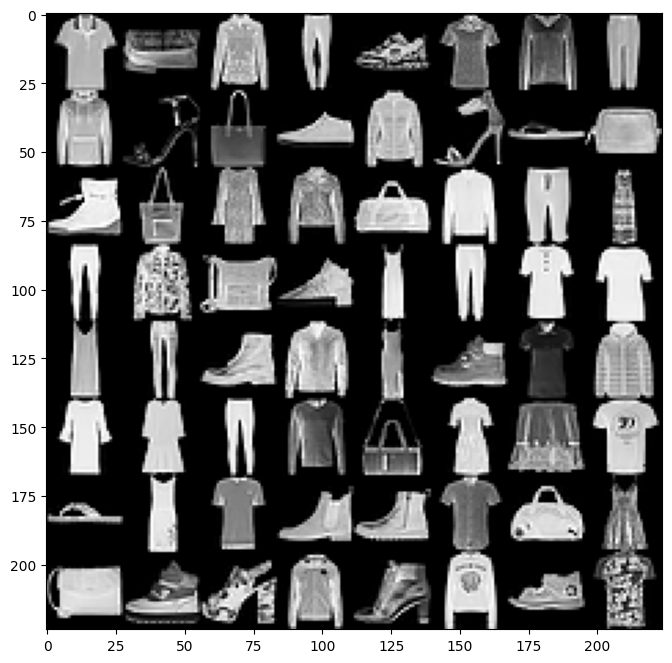

[['T-shirt/top' 'Bag' 'Shirt' 'Trouser' 'Sneaker' 'Shirt' 'Pullover'
  'Trouser']
 ['Pullover' 'Sandal' 'Bag' 'Sneaker' 'Coat' 'Sandal' 'Sandal' 'Bag']
 ['Ankle boot' 'Bag' 'Dress' 'Coat' 'Bag' 'Coat' 'Trouser' 'Dress']
 ['Trouser' 'Coat' 'Bag' 'Sneaker' 'Dress' 'Trouser' 'Shirt'
  'T-shirt/top']
 ['Dress' 'Trouser' 'Ankle boot' 'Coat' 'Dress' 'Ankle boot'
  'T-shirt/top' 'Coat']
 ['Dress' 'Dress' 'Trouser' 'Pullover' 'Bag' 'Dress' 'Shirt'
  'T-shirt/top']
 ['Sandal' 'Dress' 'T-shirt/top' 'Ankle boot' 'Ankle boot' 'Shirt' 'Bag'
  'Dress']
 ['Bag' 'Ankle boot' 'Sandal' 'Coat' 'Ankle boot' 'Pullover' 'Sandal'
  'T-shirt/top']]
Epoch 1/10:
Train Loss: 0.4678, Val Loss: 0.3308, Val Acc: 87.69%
Epoch 2/10:
Train Loss: 0.3009, Val Loss: 0.3033, Val Acc: 88.97%
Epoch 3/10:
Train Loss: 0.2572, Val Loss: 0.2566, Val Acc: 90.54%
Epoch 4/10:
Train Loss: 0.2251, Val Loss: 0.2654, Val Acc: 90.18%
Epoch 5/10:
Train Loss: 0.2008, Val Loss: 0.2407, Val Acc: 91.26%
Epoch 6/10:
Train Loss: 0.1793, Val L

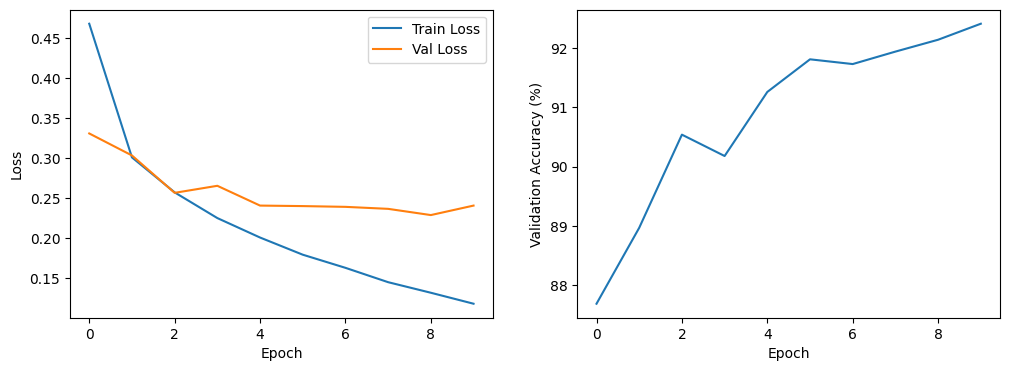

Final Test Accuracy: 92.41%


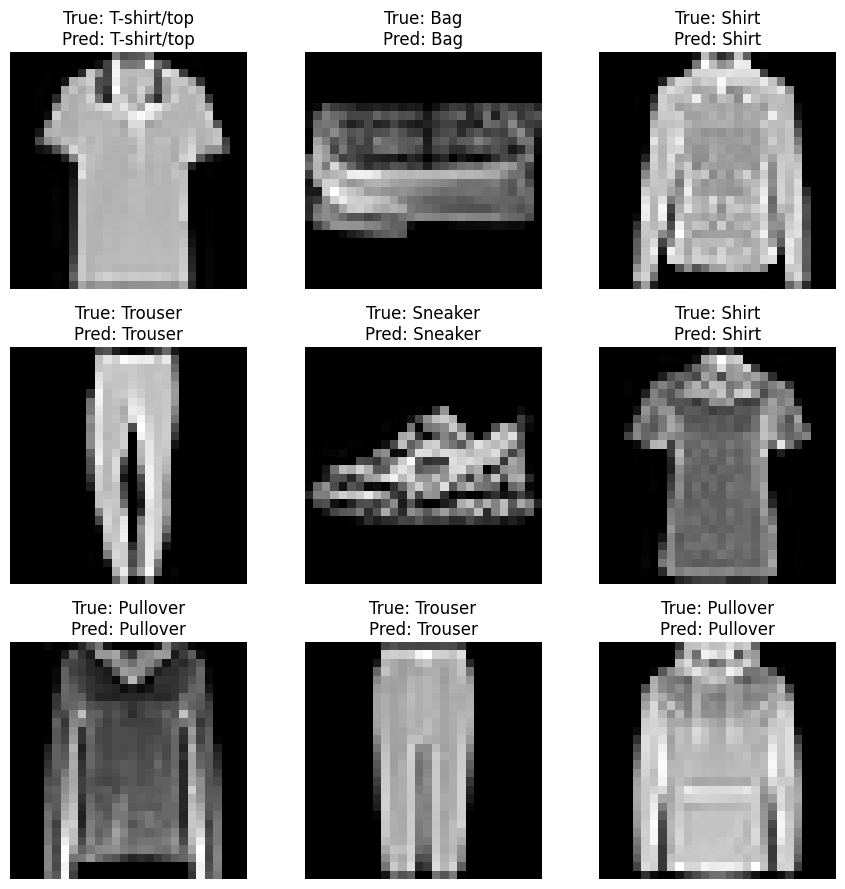

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                               ])

trainset = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

sample_images, sample_labels = next(iter(trainloader))

plt.figure(figsize=(8, 8))
plt.imshow(
    sample_images.numpy().reshape(8, 8, 28, 28).transpose((0, 2, 1, 3)).reshape(224, 224),
    cmap='gray'
)
plt.show()
print(label_names[sample_labels.numpy().reshape(8, 8)])

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(testloader)
    val_losses.append(avg_val_loss)
    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {accuracy:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.show()

model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print(f'Final Test Accuracy: {100 * correct / total:.2f}%')

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    img = sample_images[i].squeeze()
    true_label = label_names[sample_labels[i]]

    with torch.no_grad():
        output = model(sample_images[i:i+1])
        pred_label = label_names[torch.argmax(output)]

    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

2_1

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                               ])

trainset = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)
testset  = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class ModelA(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.layers(x)

class ModelB(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.layers(x)

class Ensemble(nn.Module):
    def __init__(self, m1, m2):
        super().__init__()
        self.m1 = m1
        self.m2 = m2
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        o1 = self.softmax(self.m1(x))
        o2 = self.softmax(self.m2(x))
        return (o1 + o2) / 2

modelA = ModelA()
modelB = ModelB()
model = Ensemble(modelA, modelB)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(epoch+1, loss.item())

correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy:', correct/total)


1 1.6609504222869873
2 1.5977675914764404
3 1.6228032112121582
4 1.6451526880264282
5 1.633251428604126
Accuracy: 0.8489


#Homework_9

1

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: data/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: data/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: data/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: data/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: data/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: data/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: data/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: data/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: data/train/83fad0718581a696132c96c166472627.jpg  
  inflating: data/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: data/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: data/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: data/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: data/train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: data/train/840dbad5a691c22611d85b2488

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 | train | loss=2.1543 acc=0.4572
Epoch 1 | valid | loss=0.5455 acc=0.8331


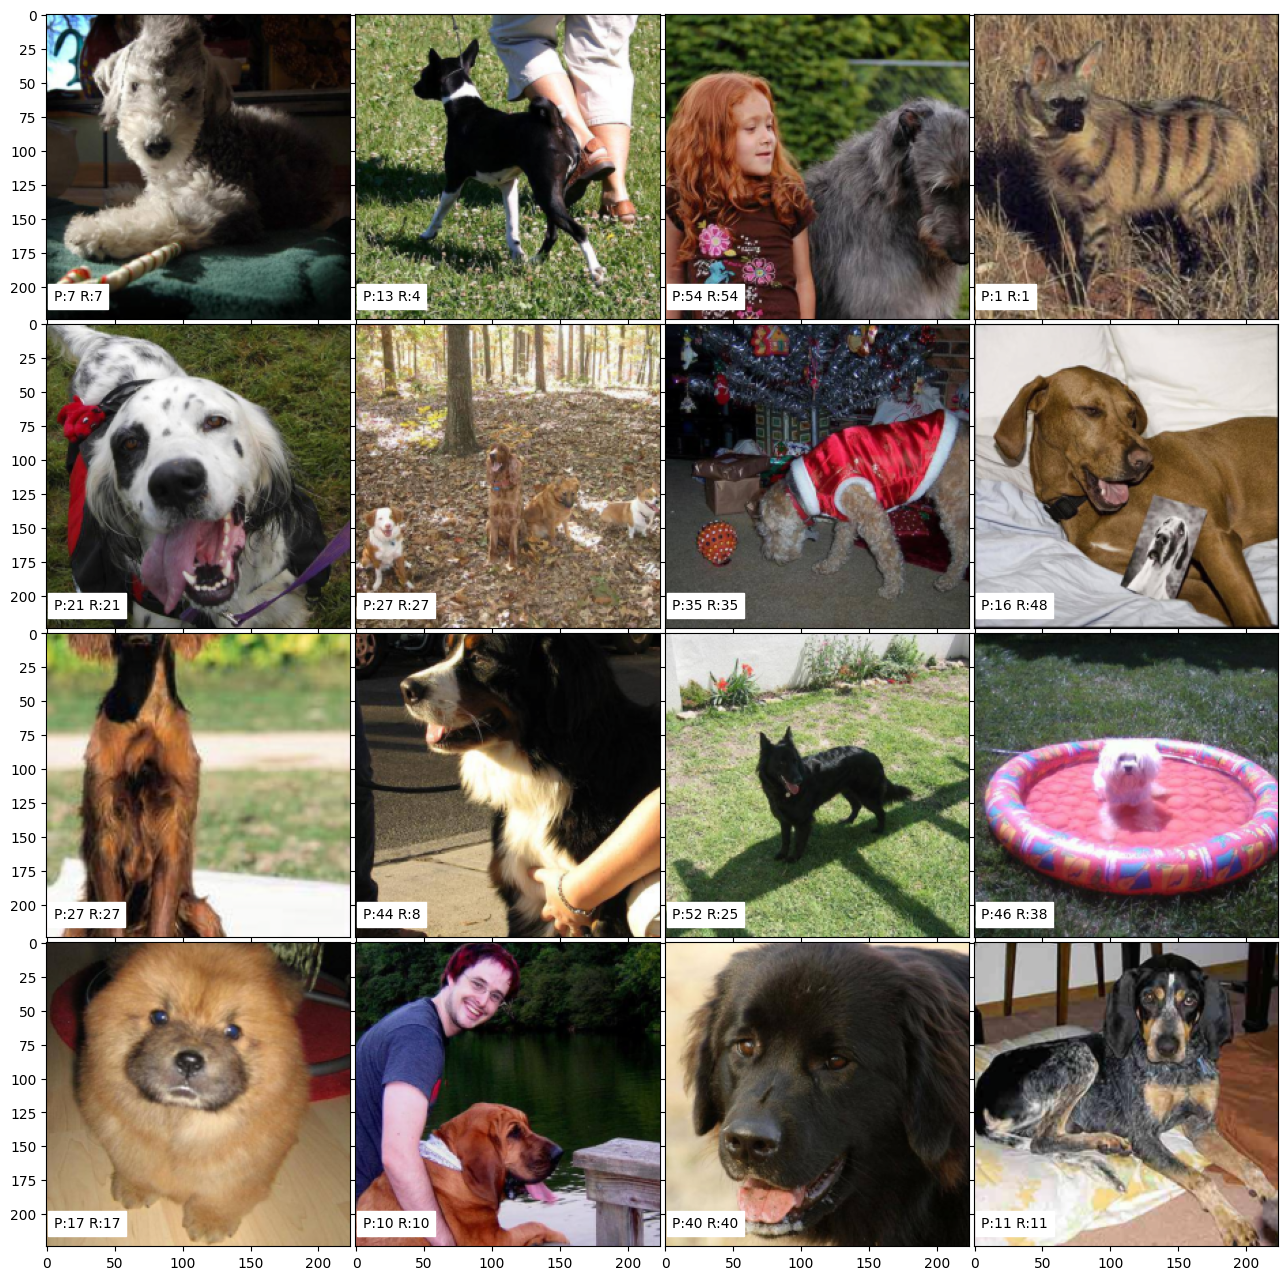

In [10]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os.path import join
from PIL import Image
import torch
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torchvision

np.random.seed(1337)

!gdown 1RGqMvfHHoZDB7wNAgckY7lwpJOKkHruC
!unzip dog-breed-identification.zip -d data

INPUT_SIZE = 224
NUM_CLASSES = 64

data_dir = '/content/data/'
labels = pd.read_csv(join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))

top_breeds = labels['breed'].value_counts().nlargest(NUM_CLASSES).index
labels = labels[labels['breed'].isin(top_breeds)]

labels["target"] = 1
labels_pivot = labels.pivot(index="id", columns="breed", values="target").fillna(0).reset_index()

train = labels_pivot.sample(frac=0.8, random_state=42)
valid = labels_pivot[~labels_pivot['id'].isin(train['id'])]

class DogsDataset(Dataset):
    def __init__(self, labels, root_dir, transform=None):
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = f"{self.labels.iloc[idx,0]}.jpg"
        image = Image.open(join(self.root_dir, img_name)).convert('RGB')
        label = np.argmax(self.labels.iloc[idx,1:].to_numpy())

        if self.transform:
            image = self.transform(image)

        return image, label

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
ds_trans = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
])

train_ds = DogsDataset(train, data_dir+'train/', transform=ds_trans)
valid_ds = DogsDataset(valid, data_dir+'train/', transform=ds_trans)

train_dl = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=2)
valid_dl = DataLoader(valid_ds, batch_size=4, shuffle=False, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet = models.resnet50(pretrained=True)
for p in resnet.parameters(): p.requires_grad = False

resnet.fc = torch.nn.Linear(resnet.fc.in_features, NUM_CLASSES)
resnet = resnet.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=1e-3)
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

def train_model(dataloaders, model, num_epochs=1):
    for epoch in range(num_epochs):
        for phase in ["train", "valid"]:
            model.train(phase=="train")
            run_loss = 0
            run_corrects = 0

            for x,y in dataloaders[phase]:
                x,y = x.to(device), y.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase=="train"):
                    out = model(x)
                    loss = criterion(out,y)
                    _,pred = torch.max(out,1)

                    if phase=="train":
                        loss.backward()
                        optimizer.step()

                run_loss += loss.item()*x.size(0)
                run_corrects += torch.sum(pred==y)

            if phase=="train": scheduler.step()
            print(f"Epoch {epoch+1} | {phase} | loss={run_loss/len(dataloaders[phase].dataset):.4f} acc={run_corrects.double()/len(dataloaders[phase].dataset):.4f}")

    return model

dloaders={'train':train_dl,'valid':valid_dl}
model=train_model(dloaders,resnet,num_epochs=1)

def visualize_model(dataloaders, model, num_images=16):
    fig=plt.figure(figsize=(16,16))
    grid=ImageGrid(fig,111,nrows_ncols=(4,4),axes_pad=0.05)
    cnt=0

    for x,y in dataloaders['valid']:
        x,y = x.to(device), y.to(device)
        out=model(x)
        _,pred=torch.max(out.data,1)

        for j in range(x.size()[0]):
            ax=grid[cnt]
            img=x.cpu().numpy()[j].transpose((1,2,0))*[0.229,0.224,0.225]+[0.485,0.456,0.406]
            ax.imshow(img)
            ax.text(5,210,f"P:{pred[j].item()} R:{y[j].item()}",
                    color='k',backgroundcolor='w')
            cnt+=1
            if cnt==num_images: return

visualize_model(dloaders, model)



2

AE Epoch 1/3 train=0.049276 val=0.030945
AE Epoch 2/3 train=0.027501 val=0.026050
AE Epoch 3/3 train=0.023325 val=0.022129
Модель создана. Размеры:
Вход: 128x128
Параметры: 10,306,243

Оригинальные изображения для интерполяции:


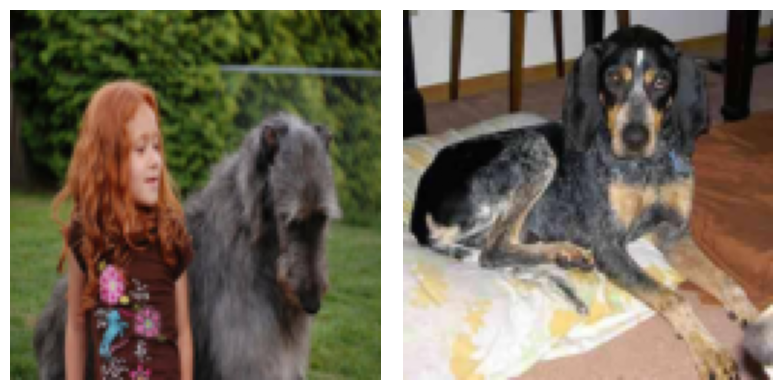


Интерполяция между изображениями 2 и 15:


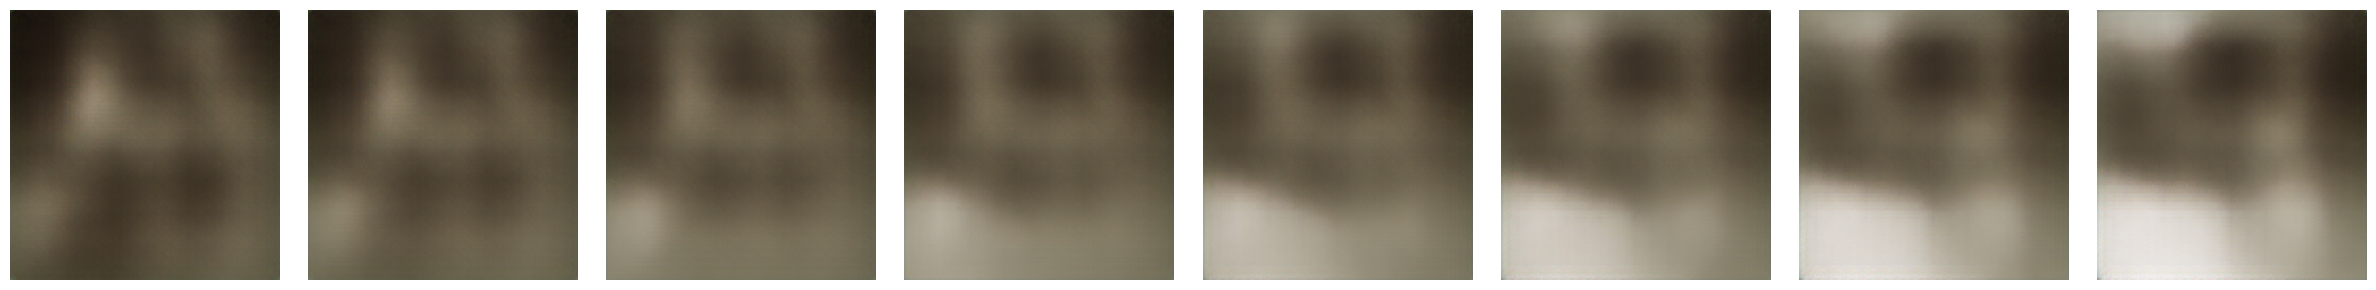

In [21]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

DATA_DIR = '/content/data/'
NUM_CLASSES = 64
INPUT_SIZE = 128
BATCH = 32
LATENT_DIM = 256
LABEL_EMB = 64
AE_EPOCHS = 3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

labels_df = pd.read_csv(join(DATA_DIR, 'labels.csv'))
top_breeds = labels_df['breed'].value_counts().nlargest(NUM_CLASSES).index
labels = labels_df[labels_df['breed'].isin(top_breeds)].copy()
labels['target'] = 1
labels_pivot = labels.pivot(index="id", columns="breed", values="target").fillna(0).reset_index()
train_df = labels_pivot.sample(frac=0.8, random_state=42).reset_index(drop=True)
valid_df = labels_pivot[~labels_pivot['id'].isin(train_df['id'])].reset_index(drop=True)

transform_ae = transforms.Compose([
    transforms.Resize((INPUT_SIZE, INPUT_SIZE)),
    transforms.CenterCrop(INPUT_SIZE),
    transforms.ToTensor()
])

class DogsDataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.df = df
        self.root = root
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_id = str(self.df.iloc[idx,0])
        img = Image.open(join(self.root, img_id + '.jpg')).convert('RGB')
        if self.transform: img = self.transform(img)
        label = int(np.argmax(self.df.iloc[idx,1:].to_numpy()))
        return img, label

train_ds = DogsDataset(train_df, join(DATA_DIR,'train/'), transform=transform_ae)
valid_ds = DogsDataset(valid_df, join(DATA_DIR,'train/'), transform=transform_ae)
train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_ds, batch_size=BATCH, shuffle=False, num_workers=2)

class ConditionalAutoencoder(nn.Module):
    def __init__(self, latent_dim=256, n_classes=64, label_emb=64):
        super().__init__()

        self.enc = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((4, 4))
        )
        self.flatten = nn.Flatten()
        self.fc_z = nn.Linear(512 * 4 * 4, latent_dim)
        self.label_emb = nn.Embedding(n_classes, label_emb)
        self.fc_dec = nn.Linear(latent_dim + label_emb, 512 * 4 * 4)
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.enc(x)
        h = self.flatten(h)
        z = self.fc_z(h)
        return z

    def decode(self, z, labels):
        le = self.label_emb(labels)
        inp = torch.cat([z, le], dim=1)
        h = self.fc_dec(inp)
        h = h.view(-1, 512, 4, 4)
        out = self.dec(h)
        return out

    def forward(self, x, labels):
        z = self.encode(x)
        out = self.decode(z, labels)
        return out, z

ae = ConditionalAutoencoder(latent_dim=LATENT_DIM, n_classes=NUM_CLASSES, label_emb=LABEL_EMB).to(DEVICE)
opt = optim.Adam(ae.parameters(), lr=1e-3)
crit = nn.MSELoss()

for epoch in range(AE_EPOCHS):
    ae.train()
    train_loss = 0.0
    for imgs, labs in train_loader:
        imgs = imgs.to(DEVICE)
        labs = labs.to(DEVICE)
        opt.zero_grad()
        recon, _ = ae(imgs, labs)
        loss = crit(recon, imgs)
        loss.backward()
        opt.step()
        train_loss += loss.item() * imgs.size(0)
    train_loss /= len(train_loader.dataset)
    ae.eval()
    val_loss = 0.0
    with torch.no_grad():
        for imgs, labs in valid_loader:
            imgs = imgs.to(DEVICE)
            labs = labs.to(DEVICE)
            recon, _ = ae(imgs, labs)
            val_loss += crit(recon, imgs).item() * imgs.size(0)
    val_loss /= len(valid_loader.dataset)
    print(f"AE Epoch {epoch+1}/{AE_EPOCHS} train={train_loss:.6f} val={val_loss:.6f}")

def show_grid(tensors, ncols=8, figsize=(12,6)):
    n = len(tensors)
    nrows = (n + ncols - 1)//ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for i in range(n):
        img = tensors[i].permute(1,2,0).cpu().numpy()
        axes[i].imshow(np.clip(img, 0, 1))
        axes[i].axis('off')
    for i in range(n, len(axes)):
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

def interpolate(ae, ds, idx1, idx2, steps=8):
    img1, lab1 = ds[idx1]
    img2, lab2 = ds[idx2]

    x1 = img1.unsqueeze(0).to(DEVICE)
    x2 = img2.unsqueeze(0).to(DEVICE)
    l1 = torch.tensor([lab1], device=DEVICE)
    l2 = torch.tensor([lab2], device=DEVICE)

    with torch.no_grad():
        z1 = ae.encode(x1)
        z2 = ae.encode(x2)
        emb1 = ae.label_emb(l1)
        emb2 = ae.label_emb(l2)

        outs = []
        for alpha in np.linspace(0, 1, steps):
            z = (1 - alpha) * z1 + alpha * z2
            le = (1 - alpha) * emb1 + alpha * emb2
            h = ae.fc_dec(torch.cat([z, le], dim=1))
            h = h.view(-1, 512, 4, 4)
            out = ae.dec(h)
            outs.append(out.squeeze(0))

    show_grid(outs, ncols=steps, figsize=(3 * steps, 3))

print("Модель создана. Размеры:")
print(f"Вход: {INPUT_SIZE}x{INPUT_SIZE}")
print(f"Параметры: {sum(p.numel() for p in ae.parameters()):,}")

print("\nОригинальные изображения для интерполяции:")
with torch.no_grad():
    img1, lab1 = valid_ds[2]
    img2, lab2 = valid_ds[15]
    show_grid([img1, img2], ncols=2, figsize=(8, 4))

print("\nИнтерполяция между изображениями 2 и 15:")
interpolate(ae, valid_ds, 2, 15, steps=8)

3

In [ ]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
from os.path import join
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

DATA_DIR = '/content/data/'
NUM_CLASSES = 64
INPUT_SIZE = 224
BATCH = 16
CLF_EPOCHS = 4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

labels_df = pd.read_csv(join(DATA_DIR, 'labels.csv'))
top_breeds = labels_df['breed'].value_counts().nlargest(NUM_CLASSES).index
labels = labels_df[labels_df['breed'].isin(top_breeds)].copy()
labels['target'] = 1
labels_pivot = labels.pivot(index="id", columns="breed", values="target").fillna(0).reset_index()
train_df = labels_pivot.sample(frac=0.8, random_state=42).reset_index(drop=True)
valid_df = labels_pivot[~labels_pivot['id'].isin(train_df['id'])].reset_index(drop=True)

transform_train = transforms.Compose([
    transforms.Resize(INPUT_SIZE),
    transforms.RandomResizedCrop(INPUT_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
transform_val = transforms.Compose([
    transforms.Resize(INPUT_SIZE),
    transforms.CenterCrop(INPUT_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

class DogsDataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.df = df
        self.root = root
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_id = str(self.df.iloc[idx,0])
        img = Image.open(join(self.root, img_id + '.jpg')).convert('RGB')
        if self.transform: img = self.transform(img)
        label = int(np.argmax(self.df.iloc[idx,1:].to_numpy()))
        return img, label

train_ds = DogsDataset(train_df, join(DATA_DIR,'train/'), transform=transform_train)
valid_ds = DogsDataset(valid_df, join(DATA_DIR,'train/'), transform=transform_val)
train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_ds, batch_size=BATCH, shuffle=False, num_workers=4)

def make_resnet(num_classes, finetune=False):
    m = models.resnet50(pretrained=True)
    if not finetune:
        for p in m.parameters(): p.requires_grad = False
    m.fc = nn.Linear(m.fc.in_features, num_classes)
    return m

def make_densenet(num_classes, finetune=False):
    m = models.densenet121(pretrained=True)
    if not finetune:
        for p in m.parameters(): p.requires_grad = False
    m.classifier = nn.Linear(m.classifier.in_features, num_classes)
    return m

resnet = make_resnet(NUM_CLASSES, finetune=False).to(DEVICE)
densenet = make_densenet(NUM_CLASSES, finetune=False).to(DEVICE)

criterion = nn.CrossEntropyLoss()
opt_res = optim.Adam(resnet.fc.parameters(), lr=1e-3, weight_decay=1e-4)
opt_den = optim.Adam(densenet.classifier.parameters(), lr=1e-3, weight_decay=1e-4)
sched_res = optim.lr_scheduler.StepLR(opt_res, step_size=3, gamma=0.1)
sched_den = optim.lr_scheduler.StepLR(opt_den, step_size=3, gamma=0.1)

def train_one_epoch(model, optimizer, loader):
    model.train()
    for imgs, labs in loader:
        imgs = imgs.to(DEVICE)
        labs = labs.to(DEVICE)
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labs)
        loss.backward()
        optimizer.step()

def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labs in loader:
            imgs = imgs.to(DEVICE)
            labs = labs.to(DEVICE)
            out = model(imgs)
            _, pred = torch.max(out,1)
            total += labs.size(0)
            correct += (pred==labs).sum().item()
    return correct/total

for epoch in range(CLF_EPOCHS):
    train_one_epoch(resnet, opt_res, train_loader)
    train_one_epoch(densenet, opt_den, train_loader)
    sched_res.step()
    sched_den.step()
    acc_res = evaluate(resnet, valid_loader)
    acc_den = evaluate(densenet, valid_loader)
    print(f"Epoch {epoch+1} ResNet val_acc={acc_res:.4f} DenseNet val_acc={acc_den:.4f}")

def ensemble_predict(models, loader):
    for m in models: m.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labs in loader:
            imgs = imgs.to(DEVICE)
            labs = labs.to(DEVICE)
            logits = [m(imgs) for m in models]
            avg = torch.mean(torch.stack(logits), dim=0)
            _, pred = torch.max(avg,1)
            total += labs.size(0)
            correct += (pred==labs).sum().item()
    return correct/total

acc_res_final = evaluate(resnet, valid_loader)
acc_den_final = evaluate(densenet, valid_loader)
acc_ens = ensemble_predict([resnet, densenet], valid_loader)
print("Final ResNet:", acc_res_final)
print("Final DenseNet:", acc_den_final)
print("Final Ensemble:", acc_ens)

class AEBackboneClassifier(nn.Module):
    def __init__(self, ae_encoder, latent_dim, num_classes):
        super().__init__()
        self.encoder = ae_encoder
        self.pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(latent_dim, num_classes)
    def forward(self, x):
        with torch.no_grad():
            z = self.encoder.enc(x)
        z = self.pool(z).view(z.size(0), -1)
        out = self.fc(z)
        return out

from collections import OrderedDict
ae = torch.load('/content/ae_checkpoint.pth') if False else None

if ae is None:
    class SimpleEncoder(nn.Module):
        def __init__(self):
            super().__init__()
            self.enc = nn.Sequential(
                nn.Conv2d(3,32,4,2,1),
                nn.ReLU(),
                nn.Conv2d(32,64,4,2,1),
                nn.ReLU(),
                nn.Conv2d(64,128,4,2,1),
                nn.ReLU(),
                nn.Conv2d(128,256,4,2,1),
                nn.ReLU()
            )
    ae = SimpleEncoder().to(DEVICE)

ae_backbone = AEBackboneClassifier(ae, latent_dim=256, num_classes=NUM_CLASSES).to(DEVICE)
opt_ae_back = optim.Adam(ae_backbone.fc.parameters(), lr=1e-3, weight_decay=1e-4)

for epoch in range(6):
    train_one_epoch(ae_backbone, opt_ae_back, train_loader)
    acc = evaluate(ae_backbone, valid_loader)
    print(f"AE-backbone classifier epoch {epoch+1} val_acc={acc:.4f}")

acc_ae_back = evaluate(ae_backbone, valid_loader)
print("AE-backbone val acc:", acc_ae_back)

print("Сравнение моделей:")
print("ResNet:", acc_res_final)
print("DenseNet:", acc_den_final)
print("AE-backbone:", acc_ae_back)
print("Ensemble (ResNet+DenseNet):", acc_ens)



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Epoch 1 ResNet val_acc=0.8132 DenseNet val_acc=0.7942


#Homework_10